In [2]:
import numpy as np
import matplotlib.pyplot as plt
from autograd import grad
# from autograd import elementwise_grad as egrad  # for functions that vectorize over inputs
# %matplotlib inline

神经网络中用的函数的定义

In [3]:
def fmorse(x,p=[1.0,1.0,2.0,0.0]):
    ro,De,alpha,e0 = p
    r_ = x - ro
    return De*(np.exp(-2.0*alpha*r_)-2.0*np.exp(-alpha*r_)) + e0
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x)*(1.0-sigmoid(x))

In [102]:
X  = np.linspace(0.6,3.0,50)  # 产生一向量，做为输入数据
Y  = fmorse(X)
X_ = X.copy()

X = np.expand_dims(X,axis=1)
X = np.expand_dims(X,axis=2)  # 扩维，方便后续计算

Y_= fmorse(X)
# print(Y_)

神经网络权重和偏置

In [92]:
w1 = np.random.normal(loc=0.1, scale=0.3, size=(10,1))
b1 = np.random.normal(loc=0.1, scale=0.3, size=(10,1))
w2 = np.random.normal(loc=0.1, scale=0.3, size=(10, 10))
b2 = np.random.normal(loc=0.1, scale=0.3, size=(10,1))
w3 = np.random.normal(loc=0.1, scale=0.3, size=(1, 10))
b3 = np.random.normal(loc=0.1, scale=0.3, size=(1, 1))

In [68]:
a1  = np.matmul(w1,X)  + b1
a2  = np.matmul(w2,a1) + b2
fnn = np.squeeze(np.matmul(w3,a2) + b3)

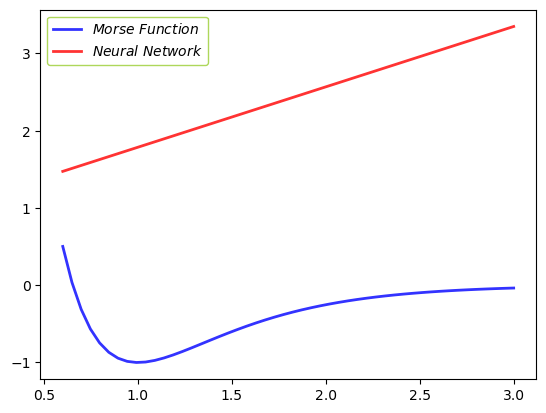

In [69]:
plt.figure()     
plt.plot(X_,Y,alpha=0.8,linewidth=2,linestyle='-',color='blue',label=r'$Morse$ $Function$')
plt.plot(X_,fnn,alpha=0.8,linewidth=2,linestyle='-',color='red',label=r'$Neural$ $Network$')
plt.legend(loc='best',edgecolor='yellowgreen')
plt.show() # plt.savefig('Morse.png')
plt.close()

In [100]:
for epoch in range(10):
    alpha = 0.0001
    a1  = np.matmul(w1,X)  + b1
    # print(a1.shape)
    a2  = np.matmul(w2,a1) + b2
    f   = np.matmul(w3,a2) + b3
    f_  = np.squeeze(f)
    Loss = np.sum(np.square(f -Y_))
    print('epoch {:d} {:f}'.format(epoch,Loss))
    
    dLdf = 2*np.sum(f-Y_)
    n_b3 = b3 - alpha*dLdf
    # print('f: ',f.shape)
    # print('a2: ',a2.shape)
    # print('w3: ',w3.shape)
    # print('n_b3: ',n_b3.shape)
    
    da3  = 2*(f-Y_)
    
    dw3   = np.sum(np.matmul(da3,a2.transpose([0,2,1])),axis=0)
    n_w3  = w3 - alpha*dw3

    da2  = np.matmul(w3.transpose(),da3)
    db2  = np.sum(da2,axis=0)
    n_b2 = b2 - alpha*db2
    
    dw2  = np.sum(np.matmul(da2,a2.transpose([0,2,1])),axis=0)
    n_w2 = w2 - alpha*dw2
    # print('db2:',dLdb2.shape)
    
    da1  = np.matmul(w2.transpose(),da2)
    db1  = np.sum(da1,axis=0)
    n_b1 = b1 - alpha*db1
    dw1  = np.sum(np.matmul(da1,X.transpose([0,2,1])),axis=0)
    n_w1 = w1 - alpha*dw1 

    b3   = n_b3
    w3   = n_w3
    b2   = n_b2
    w2   = n_w2
    b1   = n_b1
    w1   = n_w1
    # print(n_b3.shape,n_w3.shape,n_b2.shape)

epoch 0 3.658228
epoch 1 3.658228
epoch 2 3.658228
epoch 3 3.658228
epoch 4 3.658228
epoch 5 3.658228
epoch 6 3.658228
epoch 7 3.658228
epoch 8 3.658228
epoch 9 3.658228


(50,)


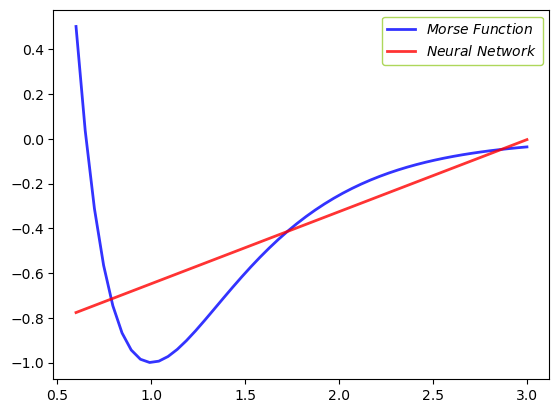

In [99]:
plt.figure()     
plt.plot(X_,Y,alpha=0.8,linewidth=2,linestyle='-',color='blue',label=r'$Morse$ $Function$')
plt.plot(X_,f_,alpha=0.8,linewidth=2,linestyle='-',color='red',label=r'$Neural$ $Network$')
plt.legend(loc='best',edgecolor='yellowgreen')
plt.show() # plt.savefig('Morse.png')
plt.close()